# Equal-Weight S&P 500 Index Fund

## Introduction & Library Imports

The S&P 500 is the world's most popular stock market index. The largest fund that is benchmarked to this index is the SPDR® S&P 500® ETF Trust. It has more than US$250 billion of assets under management.

The goal of this section of the course is to create a Python script that will accept the value of your portfolio and tell you how many shares of each S&P 500 constituent you should purchase to get an equal-weight version of the index fund.

## Library Imports

The first thing we need to do is import the open-source software libraries that we'll be using in this tutorial.

In [1]:
import numpy as np
import pandas as pd
import requests
import math

## Importing Our List of Stocks

The next thing we need to do is import the constituents of the S&P 500.

These constituents change over time, so in an ideal world you would connect directly to the index provider (Standard & Poor's) and pull their real-time constituents on a regular basis.

Paying for access to the index provider's API is outside of the scope of this course. 

There's a static version of the S&P 500 constituents available here. [Click this link to download them now](https://drive.google.com/file/d/1ZJSpbY69DVckVZlO9cC6KkgfSufybcHN/view?usp=sharing). Move this file into the `starter-files` folder so it can be accessed by other files in that directory.

Now it's time to import these stocks to our Jupyter Notebook file.

In [8]:
stocks = pd.read_csv('sp_500_stocks.csv')
stocks

,Ticker
0,A
1,AAL
2,AAP
3,AAPL
4,ABBV
...,...
500,YUM
501,ZBH
502,ZBRA
503,ZION


In [9]:
# Remoing some stocks 
stocks = stocks.drop([135, 219, 467, 484])
stocks = stocks.reset_index()
stocks

,index,Ticker
0,0,A
1,1,AAL
2,2,AAP
3,3,AAPL
4,4,ABBV
...,...,...
496,500,YUM
497,501,ZBH
498,502,ZBRA
499,503,ZION


## Acquiring an API Token

Now it's time to import our IEX Cloud API token. This is the data provider that we will be using throughout this course.

API tokens (and other sensitive information) should be stored in a `secrets.py` file that doesn't get pushed to your local Git repository. We'll be using a sandbox API token in this course, which means that the data we'll use is randomly-generated and (more importantly) has no cost associated with it.

[Click here](http://nickmccullum.com/algorithmic-trading-python/secrets.py) to download your `secrets.py` file. Move the file into the same directory as this Jupyter Notebook before proceeding.

In [10]:
from secrets import IEX_CLOUD_API_TOKEN

## Making Our First API Call

Now it's time to structure our API calls to IEX cloud. 

We need the following information from the API:

* Market capitalization for each stock
* Price of each stock



In [11]:
symbol = 'AAPL'
api_url = f'https://sandbox.iexapis.com/stable/stock/{symbol}/quote/?token={IEX_CLOUD_API_TOKEN}'
data = requests.get(api_url)

In [12]:
data.status_code

200

In [13]:
data = data.json()
data

{'avgTotalVolume': 70914061,
 'calculationPrice': 'close',
 'change': 3.69,
 'changePercent': 0.02234,
 'close': 180,
 'closeSource': 'aiilofcf',
 'closeTime': 1696916862572,
 'companyName': 'Apple Inc',
 'currency': 'USD',
 'delayedPrice': 176.03,
 'delayedPriceTime': 1673566480154,
 'extendedChange': -0.22,
 'extendedChangePercent': -0.00127,
 'extendedPrice': 176.63,
 'extendedPriceTime': 1683067256798,
 'high': 180,
 'highSource': 'eet1 nr mdpl5 daeiecyiu',
 'highTime': 1666250799507,
 'iexAskPrice': None,
 'iexAskSize': None,
 'iexBidPrice': None,
 'iexBidSize': None,
 'iexClose': 178.1,
 'iexCloseTime': 1735048567809,
 'iexLastUpdated': None,
 'iexMarketPercent': None,
 'iexOpen': 176.61,
 'iexOpenTime': 1716721911224,
 'iexRealtimePrice': None,
 'iexRealtimeSize': None,
 'iexVolume': None,
 'lastTradeTime': 1662806050470,
 'latestPrice': 179.4,
 'latestSource': 'Close',
 'latestTime': 'August 12, 2022',
 'latestUpdate': 1705552871953,
 'latestVolume': 69254080,
 'low': 173.5,
 '

## Parsing Our API Call

The API call that we executed in the last code block contains all of the information required to build our equal-weight S&P 500 strategy. 

With that said, the data isn't in a proper format yet. We need to parse it first.

In [14]:
price = data['latestPrice']
market_cap = data['marketCap']
print(price)
print(market_cap)

179.4
2853540218700


## Adding Our Stocks Data to a Pandas DataFrame

The next thing we need to do is add our stock's price and market capitalization to a pandas DataFrame. Think of a DataFrame like the Python version of a spreadsheet. It stores tabular data.

In [15]:
my_columns = ['Ticker', 'Stock Price', 'Market Capitalization', 'Number of Shares to Buy']
final_dataframe = pd.DataFrame(columns = my_columns)
final_dataframe

,Ticker,Stock Price,Market Capitalization,Number of Shares to Buy


In [16]:
final_dataframe = final_dataframe.append(
    pd.Series([0,0,0,0],index=my_columns),ignore_index=True
)

## Looping Through The Tickers in Our List of Stocks

Using the same logic that we outlined above, we can pull data for all S&P 500 stocks and store their data in the DataFrame using a `for` loop.

In [17]:
final_dataframe = pd.DataFrame(columns = my_columns)
for stock in stocks['Ticker']:
    print(stock)
    api_url = f'https://sandbox.iexapis.com/stable/stock/{stock}/quote/?token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(api_url)
    if data.status_code == 200:
        data = data.json()
    else:
        data = {'latestPrice':'N/A','marketCap':'N/A'}
    
    final_dataframe = final_dataframe.append(
        pd.Series([stock, data['latestPrice'], data['marketCap'], 'N/A'],index=my_columns),
        ignore_index=True
    )

A
AAL
AAP
AAPL
ABBV
ABC
ABMD
ABT
ACN
ADBE
ADI
ADM
ADP
ADSK
AEE
AEP
AES
AFL
AIG
AIV
AIZ
AJG
AKAM
ALB
ALGN
ALK
ALL
ALLE
ALXN
AMAT
AMCR
AMD
AME
AMGN
AMP
AMT
AMZN
ANET
ANSS
ANTM
AON
AOS
APA
APD
APH
APTV
ARE
ATO
ATVI
AVB
AVGO
AVY
AWK
AXP
AZO
BA
BAC
BAX
BBY
BDX
BEN
BF.B
BIIB
BIO
BK
BKNG
BKR
BLK
BLL
BMY
BR
BRK.B
BSX
BWA
BXP
C
CAG
CAH
CARR
CAT
CB
CBOE
CBRE
CCI
CCL
CDNS
CDW
CE
CERN
CF
CFG
CHD
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COG
COO
COP
COST
COTY
CPB
CPRT
CRM
CSCO
CSX
CTAS
CTL
CTSH
CTVA
CTXS
CVS
CVX
CXO
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISCK
DISH
DLR
DLTR
DOV
DOW
DPZ
DRE
DRI
DTE
DUK
DVA
DVN
DXC
DXCM
EA
EBAY
ECL
ED
EFX
EIX
EL
EMN
EMR
EOG
EQIX
EQR
ES
ESS
ETFC
ETN
ETR
EVRG
EW
EXC
EXPD
EXPE
EXR
F
FANG
FAST
FB
FBHS
FCX
FDX
FE
FFIV
FIS
FISV
FITB
FLIR
FLS
FLT
FMC
FOX
FOXA
FRC
FRT
FTI
FTNT
FTV
GD
GE
GILD
GIS
GL
GLW
GM
GOOG
GOOGL
GPC
GPN
GPS
GRMN
GS
GWW
HAL
HAS
HBAN
HBI
HCA
HD
HES
HIG
HII
HLT
HOLX
HON
HPE
HPQ
HRB
HRL
HSIC
HST
HSY
HUM
HWM
IBM
ICE
IDXX
IEX
IFF
ILMN
INCY
INF

In [18]:
final_dataframe

,Ticker,Stock Price,Market Capitalization,Number of Shares to Buy
0,A,134.58,40715571995,N/A
1,AAL,15.65,10123358211,N/A
2,AAP,209.65,12486301458,N/A
3,AAPL,178.70,2818898899749,N/A
4,ABBV,145.50,258655545378,N/A
...,...,...,...,...
496,YUM,118.72,33943048772,N/A
497,ZBH,119.45,25258555103,N/A
498,ZBRA,351.78,18331388579,N/A
499,ZION,60.66,8972221209,N/A


<AxesSubplot:>

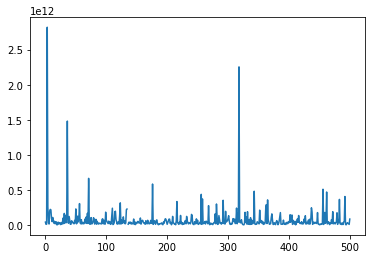

In [23]:
final_dataframe['Market Capitalization'].plot(kind='line')

## Using Batch API Calls to Improve Performance

Batch API calls are one of the easiest ways to improve the performance of your code.

This is because HTTP requests are typically one of the slowest components of a script.

Also, API providers will often give you discounted rates for using batch API calls since they are easier for the API provider to respond to.

IEX Cloud limits their batch API calls to 100 tickers per request. Still, this reduces the number of API calls we'll make in this section from 500 to 5 - huge improvement! In this section, we'll split our list of stocks into groups of 100 and then make a batch API call for each group.

In [25]:
chunks = [stocks['Ticker'][x:x+100] for x in range(0, len(stocks['Ticker']), 100)]

In [29]:
batches = []
for i in chunks:
    batches.append(','.join(i))

In [31]:
batches

['A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BF.B,BIIB,BIO,BK,BKNG,BKR,BLK,BLL,BMY,BR,BRK.B,BSX,BWA,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CERN,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA',
 'CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COO,COP,COST,COTY,CPB,CPRT,CRM,CSCO,CSX,CTAS,CTL,CTSH,CTVA,CTXS,CVS,CVX,CXO,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCK,DISH,DLR,DLTR,DOV,DOW,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,ES,ESS,ETFC,ETN,ETR,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FLIR,FLS,FLT,FMC,FOX,FOXA,FRC,FRT,FTI,FTNT,FTV,GD,GE,GILD,GIS',
 'GL,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GWW,HAL,HAS,HBAN,HBI,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRB,HRL,HSIC,HST,HSY,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILM

In [73]:
final_dataframe = pd.DataFrame(columns = my_columns)

for i in batches:
    api_url = f'https://sandbox.iexapis.com/stable/stock/market/batch?symbols={i}&types=quote&token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(api_url).json()
    
    for i in data:
        final_dataframe = final_dataframe.append(
            pd.Series([stock, data[i]['quote']['latestPrice'], data[i]['quote']['marketCap'], 'N/A'],index=my_columns),
            ignore_index=True
        )

In [76]:
final_dataframe

,Ticker,Stock Price,Market Capitalization,Number of Shares to Buy
0,ZTS,139.26,41745681010,N/A
1,ZTS,15.59,9962088232,N/A
2,ZTS,208.80,12661144533,N/A
3,ZTS,177.70,2781281605907,N/A
4,ZTS,145.90,256418250406,N/A
...,...,...,...,...
496,ZTS,119.67,34902076258,N/A
497,ZTS,122.86,25489953166,N/A
498,ZTS,349.79,18005074025,N/A
499,ZTS,58.74,8922911911,N/A


## Calculating the Number of Shares to Buy

As you can see in the DataFrame above, we stil haven't calculated the number of shares of each stock to buy.

We'll do that next.

In [102]:
portfolio_size = input('Enter the value of your portfolio: ')

try:
    val = float(portfolio_size)
except ValueError:
    print('That\'s not a number')
    portfolio_size = input('Enter the value of your portfolio: ')
    val = float(portfolio_size)

Enter the value of your portfolio: 1000000


In [103]:
position_size = val/len(final_dataframe.index)

def get_share_buy(x):
    num_to_buy = position_size/x
    num_to_buy = math.floor(num_to_buy)
    return num_to_buy

In [104]:
final_dataframe['Number of Shares to Buy'] = final_dataframe['Stock Price'].apply(get_share_buy)

In [105]:
final_dataframe

,Ticker,Stock Price,Market Capitalization,Number of Shares to Buy
0,ZTS,139.26,41745681010,14
1,ZTS,15.59,9962088232,128
2,ZTS,208.80,12661144533,9
3,ZTS,177.70,2781281605907,11
4,ZTS,145.90,256418250406,13
...,...,...,...,...
496,ZTS,119.67,34902076258,16
497,ZTS,122.86,25489953166,16
498,ZTS,349.79,18005074025,5
499,ZTS,58.74,8922911911,33


## Formatting Our Excel Output

We will be using the XlsxWriter library for Python to create nicely-formatted Excel files.

XlsxWriter is an excellent package and offers tons of customization. However, the tradeoff for this is that the library can seem very complicated to new users. Accordingly, this section will be fairly long because I want to do a good job of explaining how XlsxWriter works.

### Initializing our XlsxWriter Object

### Creating the Formats We'll Need For Our `.xlsx` File

Formats include colors, fonts, and also symbols like `%` and `$`. We'll need four main formats for our Excel document:
* String format for tickers
* \\$XX.XX format for stock prices
* \\$XX,XXX format for market capitalization
* Integer format for the number of shares to purchase

### Applying the Formats to the Columns of Our `.xlsx` File

We can use the `set_column` method applied to the `writer.sheets['Recommended Trades']` object to apply formats to specific columns of our spreadsheets.

Here's an example:

```python
writer.sheets['Recommended Trades'].set_column('B:B', #This tells the method to apply the format to column B
                     18, #This tells the method to apply a column width of 18 pixels
                     string_template #This applies the format 'string_template' to the column
                    )
```

This code works, but it violates the software principle of "Don't Repeat Yourself". 

Let's simplify this by putting it in 2 loops:

## Saving Our Excel Output

Saving our Excel file is very easy:

In [107]:
final_dataframe.to_csv('Recommended_trades.csv')